In [1]:
import cv2
import numpy as np
import self
from matplotlib import pyplot as plt
import imutils

In [2]:
img = cv2.imread("E:/MIA online training/images/test/test2.png")

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
threshold=cv2.GaussianBlur(threshold,(3,3),cv2.BORDER_DEFAULT)
hsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

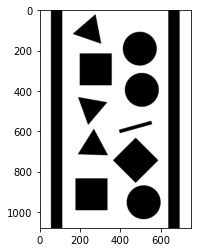

In [4]:
plt.imshow(threshold,cmap='gray')

In [5]:
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

lower_yellow= np.array([25,70,120])
upper_yellow= np.array([30,255,255])

lower_green= np.array([40,70,80])
upper_green= np.array([70,255,255])

lower_red= np.array([0,50,120])
upper_red= np.array([10,255,255])

lower_blue= np.array([90,60,0])
upper_blue= np.array([121,255,255])


In [6]:
class images:
    def shapes(self):
        i = 0

        for contour in contours:

            # ignoring first counter
            if i == 0:
                i = 1
                continue

            # cv2.approxPloyDP() function to approximate the shape
            approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
            area = cv2.contourArea(contour)

            # finding center point of shape
            M = cv2.moments(contour)
            if M['m00'] != 0.0:
                x = int(M['m10'] / M['m00'])
                y = int(M['m01'] / M['m00'])

            # putting shape name at center of each shape
            if len(approx) == 3:
                if (area > 500):
                    cv2.putText(img, 'Triangle', (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)



            elif len(approx) == 4:
                if (area > 200):
                    (x, y, w, h) = cv2.boundingRect(approx)
                    if ((float(w) / h) == 1):
                        cv2.putText(img, "square", (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
                    else:
                        cv2.putText(img, "rectangle", (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)


            elif len(approx) == 5:
                if (area > 1000):
                    cv2.putText(img, 'Pentagon', (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

            elif len(approx) == 6:
                if (area > 5000):
                    cv2.putText(img, 'Hexagon', (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

            else:
                cv2.putText(img, 'circle', (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    def colors(self):
        mask1 = cv2.inRange(hsv, lower_yellow, upper_yellow)
        mask2 = cv2.inRange(hsv, lower_green, upper_green)
        mask3 = cv2.inRange(hsv, lower_red, upper_red)
        mask4 = cv2.inRange(hsv, lower_blue, upper_blue)

        cnts1 = cv2.findContours(mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = imutils.grab_contours(cnts1)

        cnts2 = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts2 = imutils.grab_contours(cnts2)

        cnts3 = cv2.findContours(mask3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts3 = imutils.grab_contours(cnts3)

        cnts4 = cv2.findContours(mask4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts4 = imutils.grab_contours(cnts4)

        for c in cnts1:
            area1 = cv2.contourArea(c)
            if area1 > 2000:
                M = cv2.moments(c)
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(img, "Yellow", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

        for c in cnts2:
            area2 = cv2.contourArea(c)
            if area2 > 2000:
                M = cv2.moments(c)
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(img, "Green", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

        for c in cnts3:
            area3 = cv2.contourArea(c)
            if area3 > 2000:
                M = cv2.moments(c)
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(img, "Red", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

        for c in cnts4:
            area4 = cv2.contourArea(c)
            if area4 > 2000:
                M = cv2.moments(c)
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(img, "Blue", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    def show(self):
        ##imgwindow = 'show my image'   ##to open the new image in new window
        ##cv2.namedWindow(imgwindow, cv2.WINDOW_NORMAL)
        ##cv2.imshow(imgwindow, img)
        ##cv2.waitKey(0)
        ##cv2.destroyAllWindows()
        
        ## to show the image here
        plt.figure(figsize=(10,8))
        rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)


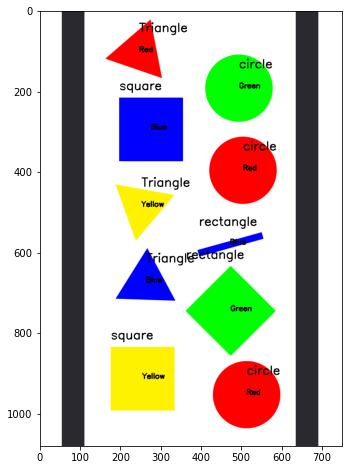

In [7]:
images.shapes(self)
images.colors(self)
images.show(self)